# Data Preprocessing and Feature Engineering Exercise

# Imports

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import seaborn as sns

# California Housing Prices Dataset

## Dataset Description

- File name: 'D2_California_Housing_Prices_Dataset.csv'

- This dataset has been obtained from Kaggle: https://www.kaggle.com/datasets/camnugent/california-housing-prices?resource=download


- This is the dataset used in the second chapter of Aurélien Géron's recent book 'Hands-On Machine learning with Scikit-Learn and TensorFlow'. 

- It serves as an excellent introduction to implementing machine learning algorithms because it requires rudimentary data cleaning, has an easily understandable list of variables and sits at an optimal size between being to toyish and too cumbersome.

- The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. 

- This data has metrics such as the population, median income, median housing price, and so on for each block group / district in California. Block groups are the smallest geographical unit for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). 

- The data contains 20640 observations with 10 columns as described below, their names are pretty self explanitory:

1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. housingMedianAge: Median age of a house within a block; a lower number is a newer building

4. total_rooms: Total number of rooms within a block

5. total_bedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. median_income: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. medianhousevalue: Median house value for households within a block (measured in US Dollars)

10. ocean_proximity: Location of the house w.r.t ocean/sea

- Let us use this data to predict median house value for a house in a district. 
- This is a regression problem with 9 attributes or features.

## Loading Data

In [10]:
#Reading the file into a dataframe
data=pd.read_csv('D2_California_Housing_Prices_Dataset.csv')
#Displaying the read contents
data
#data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       population  households  median_income  median_house_value  \
0             322         126         8.3252              452600   
1            2401        1138         8.3014              358500   
2             496         177         7.2574              352100   
3             558         219         5.6431              341300   
4             565         259         3.8462              342200   
...           ...         ...            ...                 ...   
20635         845         330         1.5603               78100   
20636         356         114         2.5568               77100   
20637        1007         433         1.7000               92300   
20638         741         349         1.8672               84700   
20639        1387         530         2.3886               89400   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

## Exploring Data

In [11]:
#Finding datatype of data
type(data)

pandas.core.frame.DataFrame

In [12]:
data.info()
#This information shows that each column has 20640 entries. 
#Non of the columns contain any 'null' value, except total_bedrooms.
#There are 5 attributes with datatype of 'object'/'string'.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [13]:
data.describe()
# The count, mean, min, and max rows are self-explanatory. 
# Note that the null values are ignored (so, for example, count of total_bedrooms is 20,433, not 20,640). 
# The std row shows the standard deviation, which measures how dispersed the values are.
# The 25%, 50%, and 75% rows show the corresponding percentiles: 
# A percentile indicates the value below which a given percentage of observations in a group of observations falls. 
# For example, 25% of the districts have a housing_median_age lower than 18, 
# while 50% are lower than 29 and 75% are lower than 37. 
# These are often called the 25th percentile (or 1st quartile), the median, and the 75th percentile (or 3rd quartile).


longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

## Visualizing Data

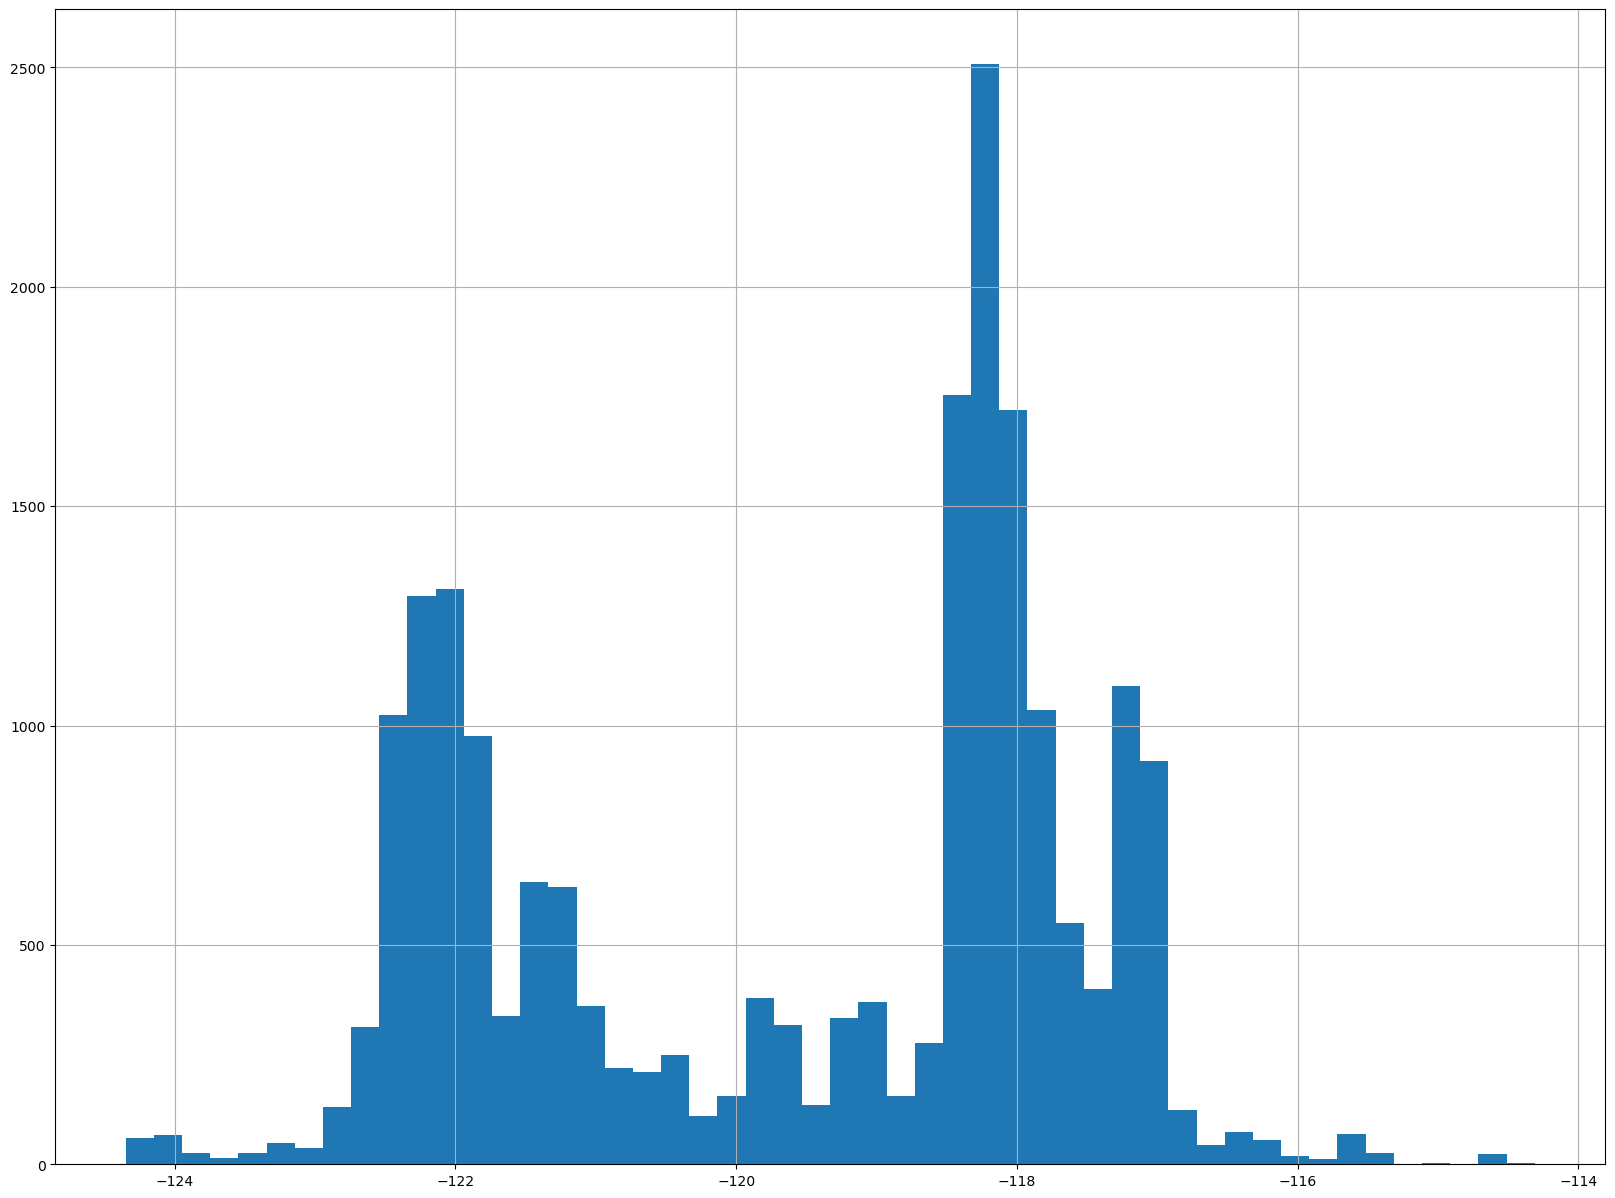

In [19]:
# Plotting histogram of one feature.
data['longitude'].hist(bins=50, figsize=(20,15))
plt.show()

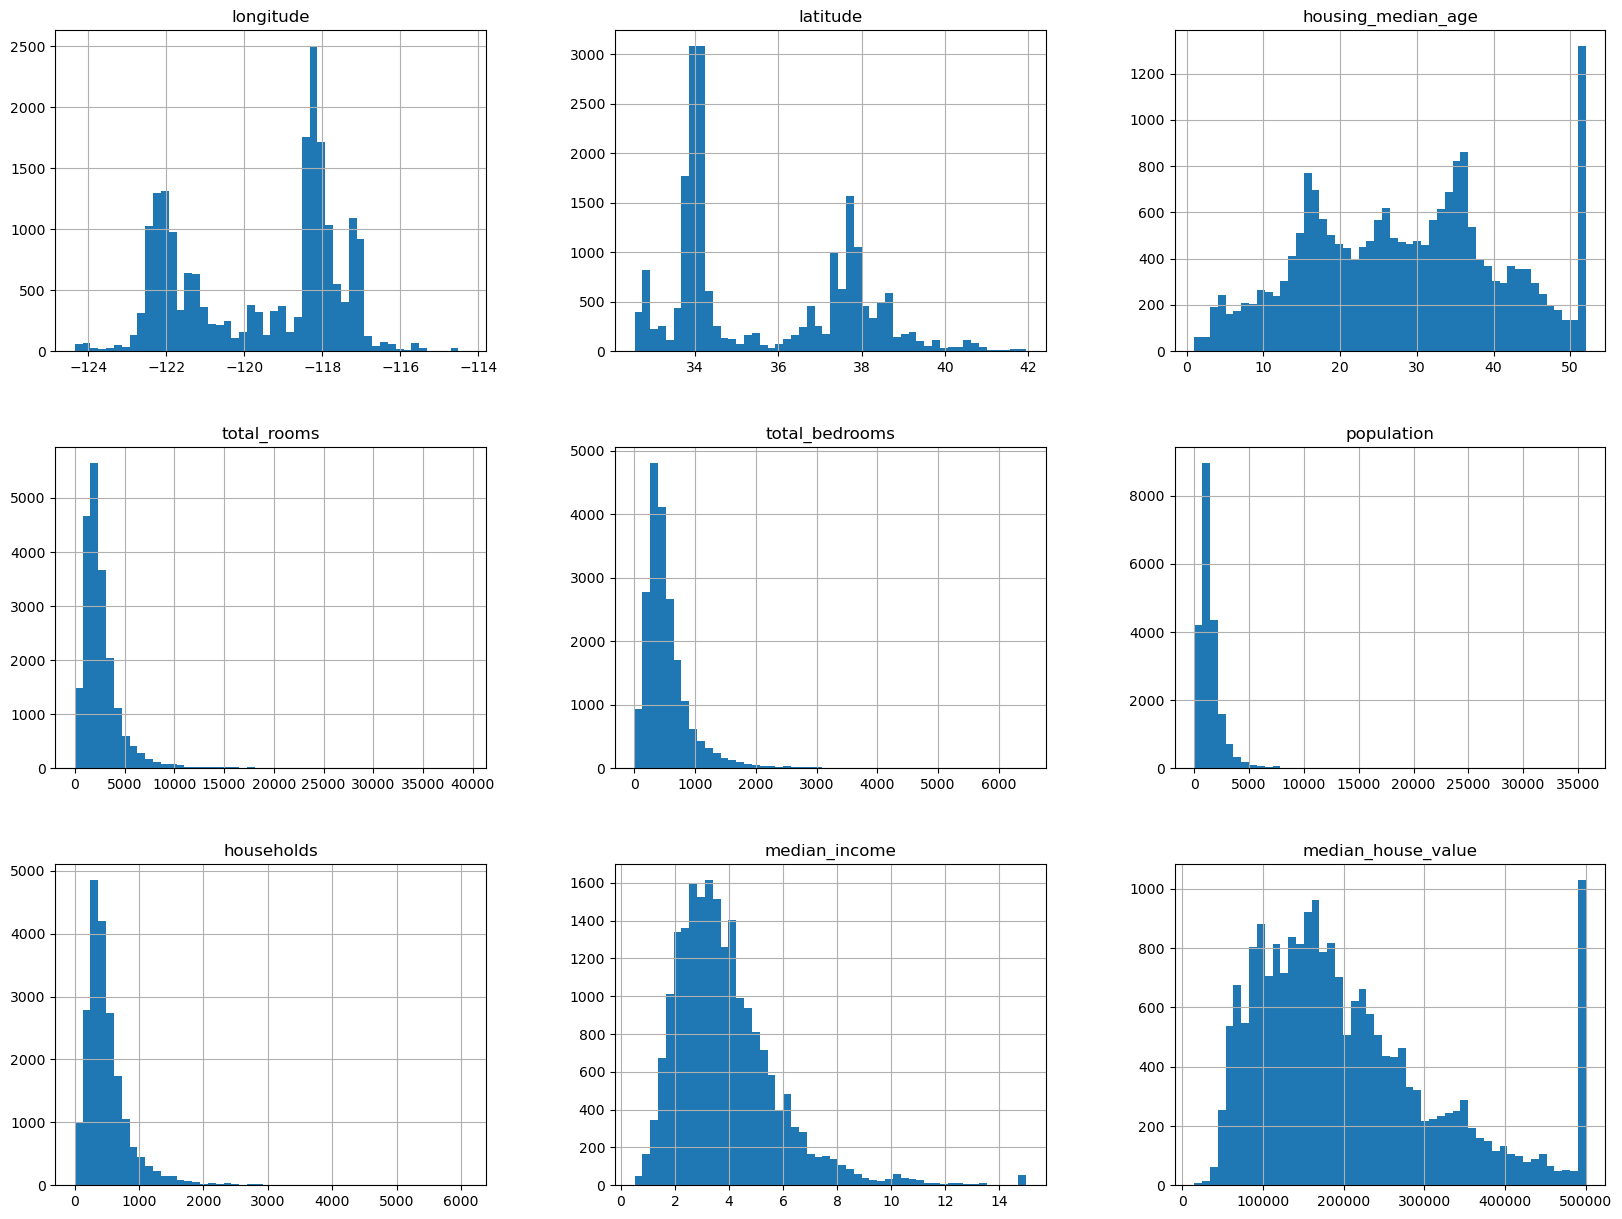

In [20]:
# Plotting histograms for all features at once.
data.hist(bins=50, figsize=(20,15))
plt.show()

## Finding Correlations

In [21]:
# corr is the method in pandas which can directly find correlation 
# between two quantities.
#Let us find the correlation between median_house_value (target) 
# and housing_median_age (feature).
correlation = data['median_house_value'].corr(data['housing_median_age'])
#The resulting value shows very very low positive correlation
correlation

0.10562341249320993

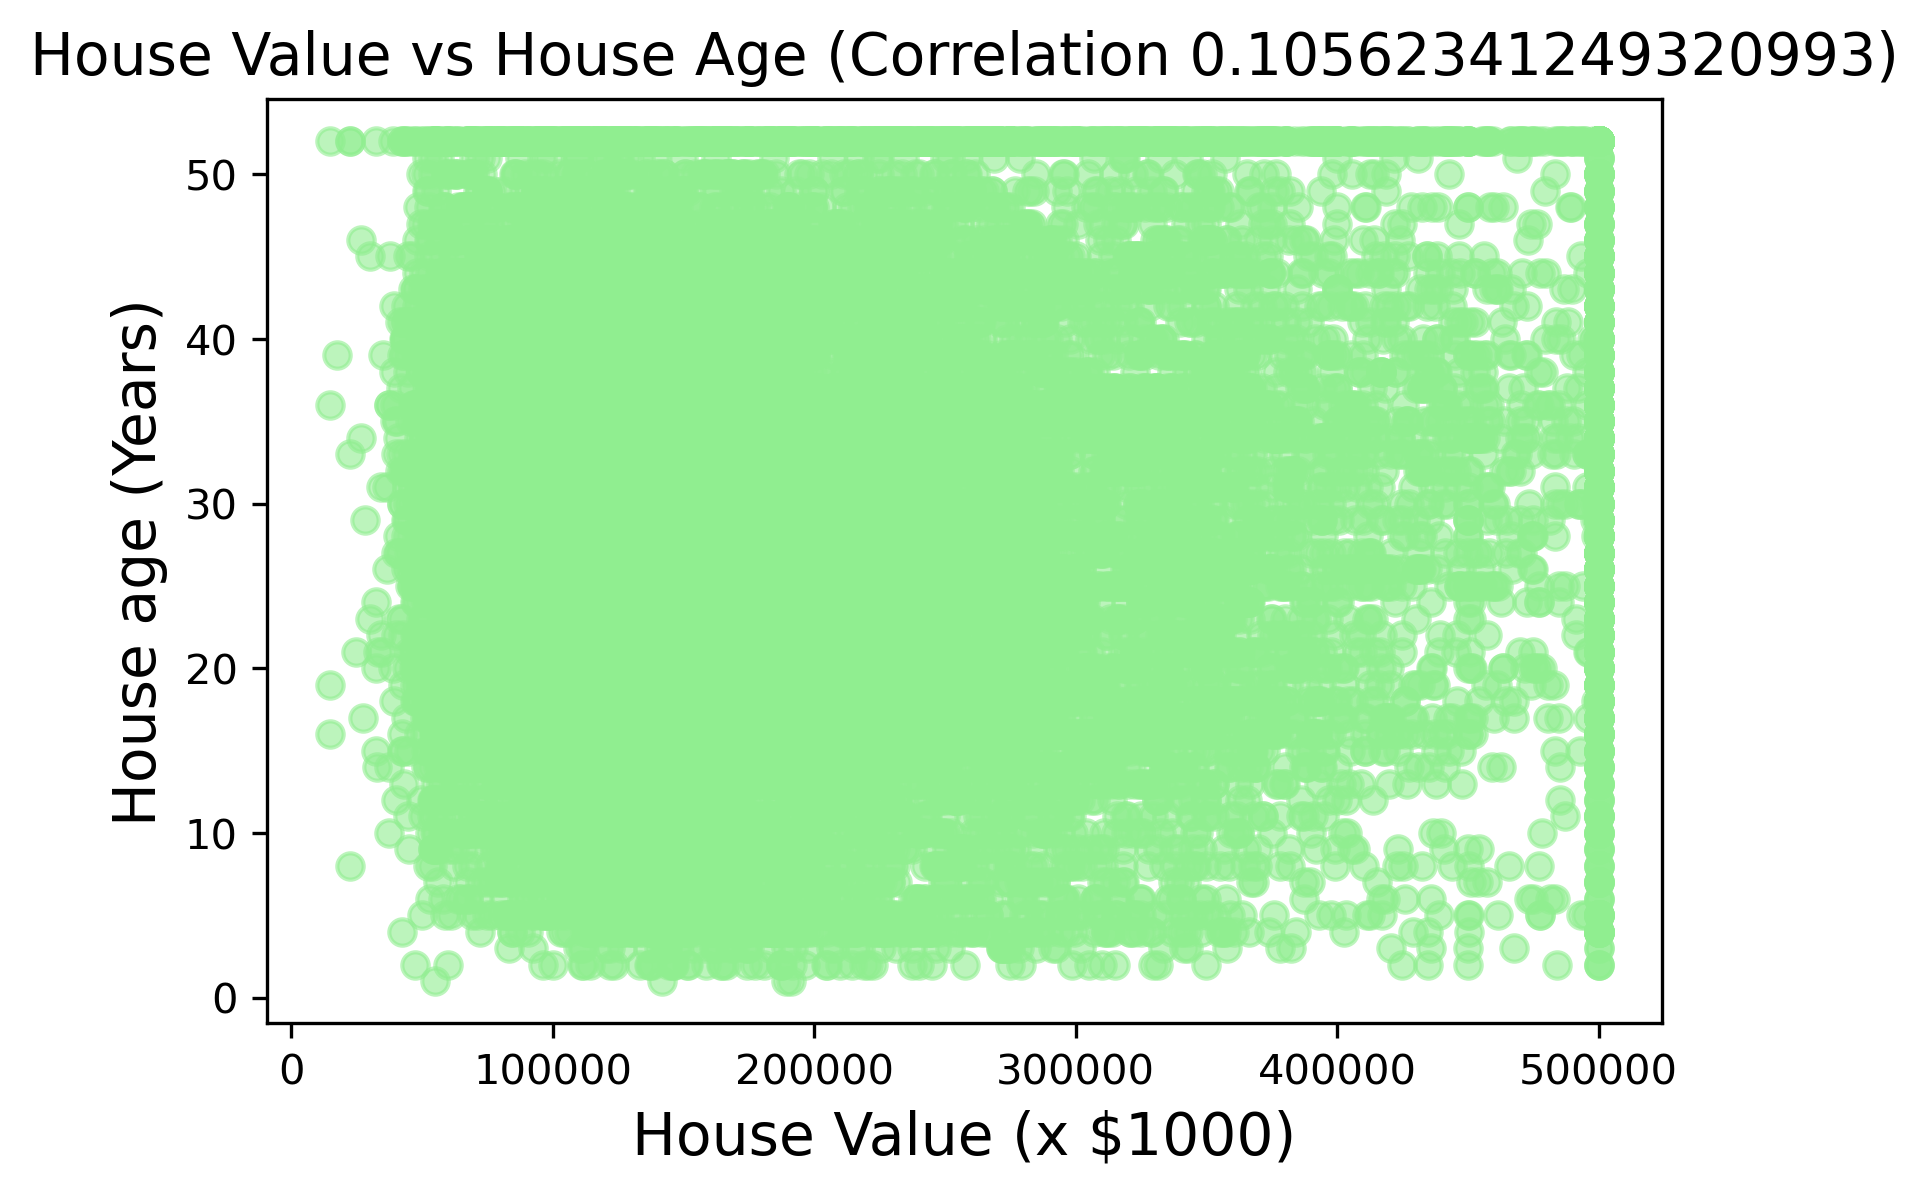

In [22]:
# Let us create a scatterplot between median_house_value (target) 
# and housing_median_age (feature) to visualize correlation.
plt.figure(figsize=(6, 4), dpi=300)
plt.scatter(x=data['median_house_value'], y=data['housing_median_age'], alpha=0.6, s=40, color='lightgreen')
plt.title(f'House Value vs House Age (Correlation {correlation})', fontsize=14)
plt.xlabel('House Value (x $1000)', fontsize=14)
plt.ylabel('House age (Years)', fontsize=14)
plt.show()


In [23]:
#Now let us find all correlation coefficients at once
data.corr()
#Here observe that correlation between INDUS and DIS is quite high and may cause multicollinearity.
#Also note that the values are same both ways, i.e. ZN and CRIME is same as CRIME and ZN.
#So upper right diagonal is same as lower left diagonal.
#Also note that correlation of a variable with itself is always 1.

#Notice that finding higher values in this dense map is difficult, there is an easier way to do this - by using a heatmap.

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_median_age       -0.320451   -0.296244   -0.302916      -0.119034   
total_rooms               0.930380    0.857126    0.918484       0.198050   
total_bedrooms            1.000000    0.877747    0.979728      -0.007723   
population                0.877747    1.000000    0.907222       0.004834   
households                0.979728    0.907222    1.000000       0.013033   
median_income            -0.007723    0.004834    0.013033       1.000000   
median_house_value        0.049686   -0.024650    0.065843       0.688075   

                    median_house_value  
longitude                    -0.045967  
latitude                     -0.144160  
housing_median_age            0.105623  
total_rooms                   0.134153  
total_bedrooms                0.049686  
population                   -0.024650  
households                    0.065843  
median_income                 0.688075  
median_house_value            1.000000

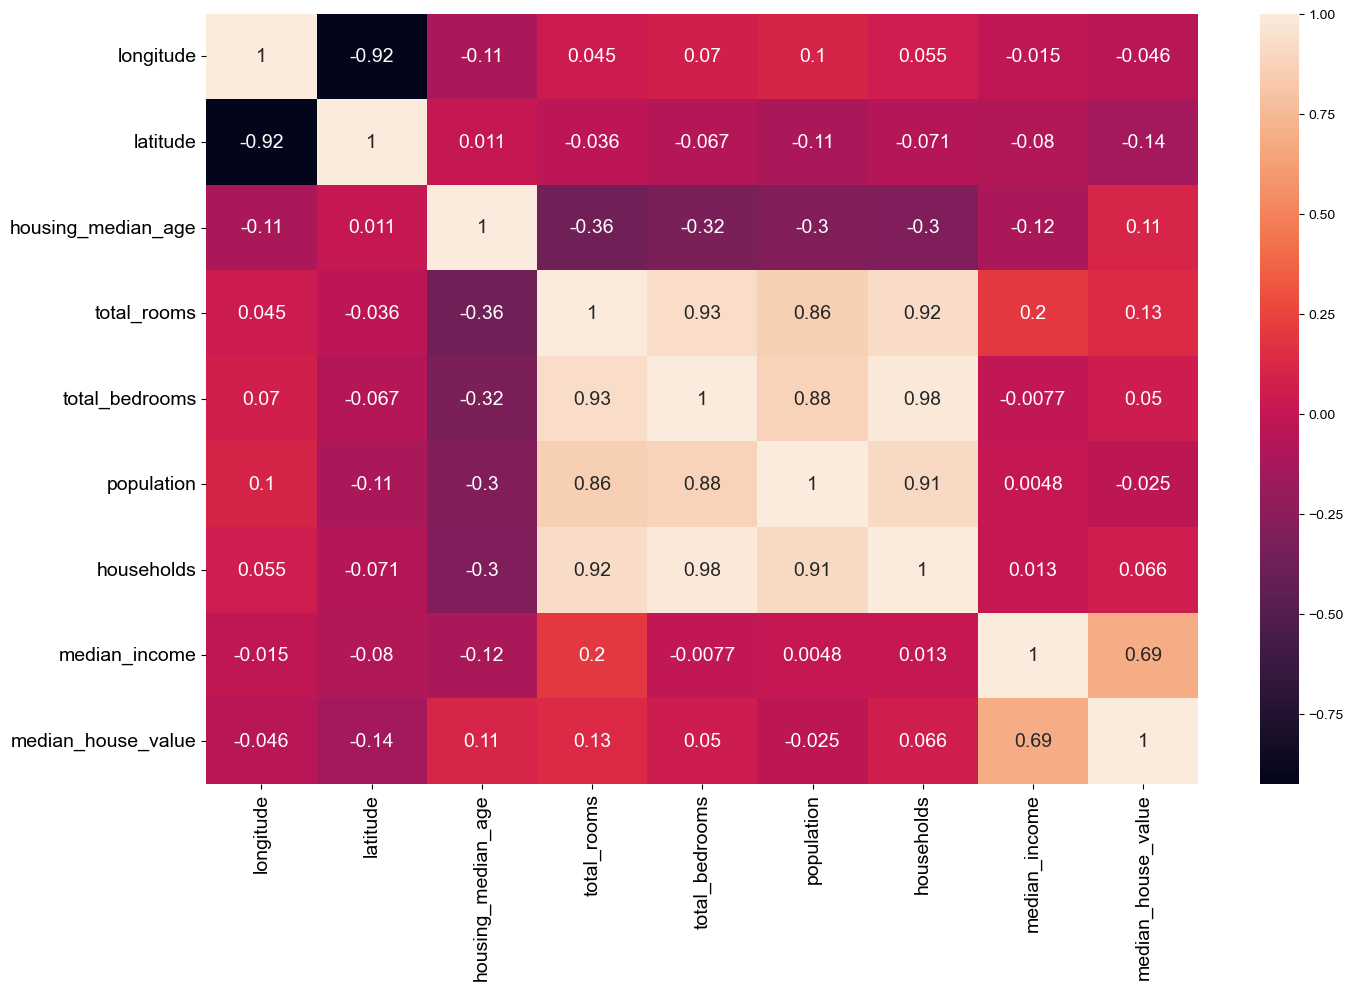

In [24]:
#A heatmap is a graphical representation of data that uses a system of color-coding to represent different values. 
#The color bar on the right side is the key.

#Generating a heatmap for all correlation coefficients. 
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(),  annot=True, annot_kws={"size": 14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### The PairPlot
- This is a method of seaborn package, which can be used to see all the scatterplots as well as histograms at once.
- The diagonal plots are histograms.

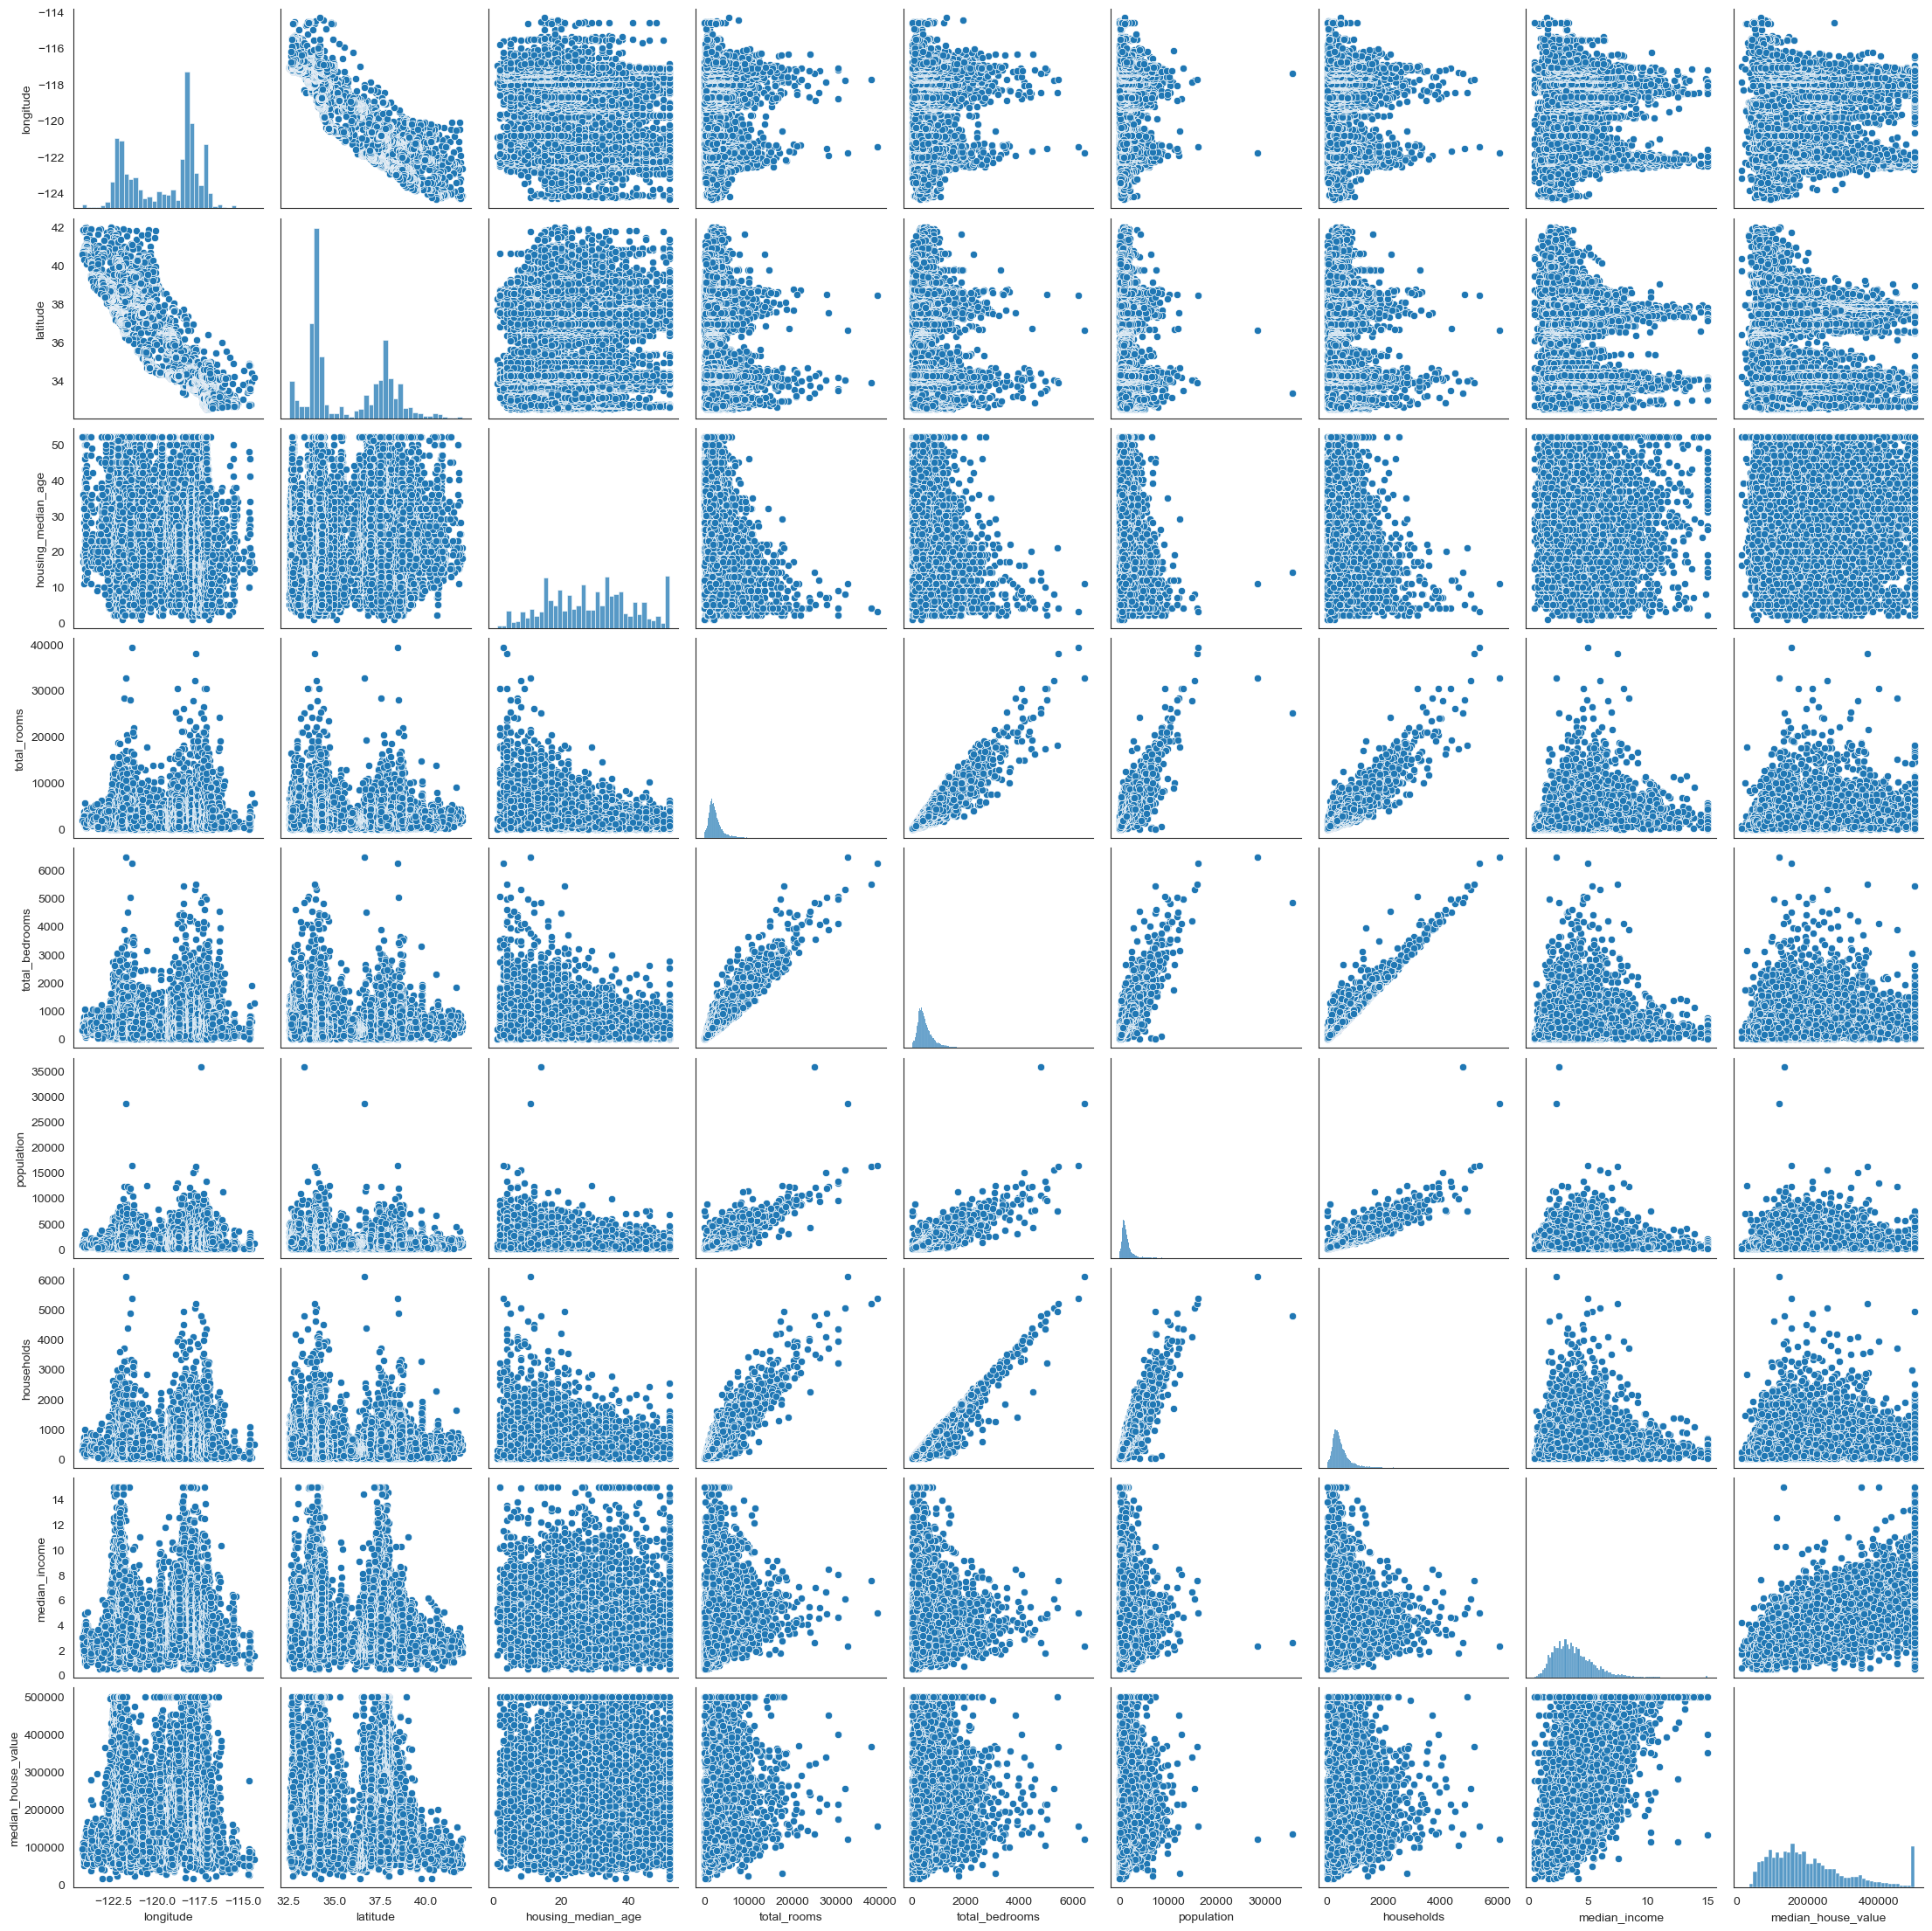

CPU times: total: 22.3 s
Wall time: 23.3 s


In [25]:
%%time 
#This time is a magic function of notebook, used to find the execution time of a piece of code.
#Since generation of pairplot will take some time, let us measure it using this magic function.
#It will print the wall time in the end.

#Generating pairplot - all correlation plots at once
sns.pairplot(data)
plt.show()

## Encoding Categorical Data

In [26]:
# ocean_proximity is the only categorical column.
# Let us find out the possible values in a column
data['ocean_proximity'].value_counts()
#This shows that there are five possible values for this attribute: '1H OCEAN', INLAND', 'NEAR OCEAN', 'NEAR BAY' or 'ISLAND'. 

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [14]:
# Applying ordinal encoding
#data_copy['ocean_proximity']=data_copy['ocean_proximity'].replace('1H OCEAN',1)
#data_copy['ocean_proximity']=data_copy['ocean_proximity'].replace('INLAND',2)
#data_copy['ocean_proximity']=data_copy['ocean_proximity'].replace('NEAR OCEAN',3)
#data_copy['ocean_proximity']=data_copy['ocean_proximity'].replace('NEAR BAY',4)
#data_copy['ocean_proximity']=data_copy['ocean_proximity'].replace('ISLAND',5)
#data_copy

In [27]:
#get_dummies is a simple method in pandas which can achieve this task.
data_encoded=pd.get_dummies(data, columns=['ocean_proximity'])
#The resulting table has five dummy variable encoded columns in place of one column.
data_encoded

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       population  households  median_income  median_house_value  \
0             322         126         8.3252              452600   
1            2401        1138         8.3014              358500   
2             496         177         7.2574              352100   
3             558         219         5.6431              341300   
4             565         259         3.8462              342200   
...           ...         ...            ...                 ...   
20635         845         330         1.5603               78100   
20636         356         114         2.5568               77100   
20637        1007         433         1.7000               92300   
20638         741         349         1.8672               84700   
20639        1387         530         2.3886               89400   

       ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
0                              0                       0   
1                              0                       0   
2                              0                       0   
3                              0                       0   
4                              0                       0   
...                          ...                     ...   
20635                          0                       1   
20636                          0                       1   
20637                          0                       1   
20638                          0                       1   
20639                          0                       1   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                           0                         1   
1                           0                         1   
2                           0                         1   
3                           0                         1   
4                           0                         1   
...                       ...                       ...   
20635                       0                         0   
20636                       0                         0   
20637                       0                         0   
20638                       0                         0   
20639                       0                         0   

       ocean_proximity_NEAR OCEAN  
0                               0  
1                               0  
2                               0  
3                               0  
4                               0  
...                           ...  
20635                           0  
20636                           0  
20637                           0  
20638                           0  
20639                           0  

[20640 rows x 14 columns]

## Fixing Missing Values

In [28]:
# An empty cell in the column 'total_bedrooms'.
data_encoded['total_bedrooms'][290]

nan

In [29]:
# total_bedrooms is an attribute which has 20433 entries and not 20640.
# Let us place the median value in the missing ones.
imputer = SimpleImputer(strategy="median")
imputer.fit(data_encoded)
X = imputer.transform(data_encoded)
#The result X is a plain NumPy array containing the transformed features. If you want to #put it back into a Pandas DataFrame, it’s simple:
data_clean = pd.DataFrame(X, columns=data_encoded.columns)

In [30]:
# Now rechecking the missing value if it has been replaced with the median.
data_clean['total_bedrooms'][290]

435.0

In [31]:
#All the cahnges that we have made so far are done on the dataframe, and not in the original csv file.
#The to_csv method can be used to save the dataframe into a csv file.
data_clean.to_csv('D2_California_Housing_Prices_Dataset_Clean.csv')

## Feature Scaling

In [32]:
data_clean

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

       ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
0                            0.0                     0.0   
1                            0.0                     0.0   
2                            0.0                     0.0   
3                            0.0                     0.0   
4                            0.0                     0.0   
...                          ...                     ...   
20635                        0.0                     1.0   
20636                        0.0                     1.0   
20637                        0.0                     1.0   
20638                        0.0                     1.0   
20639                        0.0                     1.0   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                         0.0                       1.0   
1                         0.0                       1.0   
2                         0.0                       1.0   
3                         0.0                       1.0   
4                         0.0                       1.0   
...                       ...                       ...   
20635                     0.0                       0.0   
20636                     0.0                       0.0   
20637                     0.0                       0.0   
20638                     0.0                       0.0   
20639                     0.0                       0.0   

       ocean_proximity_NEAR OCEAN  
0                             0.0  
1                             0.0  
2                             0.0  
3                             0.0  
4                             0.0  
...                           ...  
20635                         0.0  
20636                         0.0  
20637                         0.0  
20638                         0.0  
20639                         0.0  

[20640 rows x 14 columns]

### Normalization

In [33]:
# Defining min-max scaler object
minmax_scaler = MinMaxScaler()

# Normailizing a single column
#data_clean['longitude']=pd.DataFrame(minmax_scaler.fit_transform(data_clean[['longitude']]))
#Note that fit_transform method returns a ndarray, so we need to typecast it back to dataframe before placong it back into out dataset.

# This method can be run on whole dataset at once to normalize the all the columns in one go.
data_clean=pd.DataFrame(minmax_scaler.fit_transform(data_clean))

data_clean

0         1         2         3         4         5         6   \
0      0.211155  0.567481  0.784314  0.022331  0.019863  0.008941  0.020556   
1      0.212151  0.565356  0.392157  0.180503  0.171477  0.067210  0.186976   
2      0.210159  0.564293  1.000000  0.037260  0.029330  0.013818  0.028943   
3      0.209163  0.564293  1.000000  0.032352  0.036313  0.015555  0.035849   
4      0.209163  0.564293  1.000000  0.041330  0.043296  0.015752  0.042427   
...         ...       ...       ...       ...       ...       ...       ...   
20635  0.324701  0.737513  0.470588  0.042296  0.057883  0.023599  0.054103   
20636  0.312749  0.738576  0.333333  0.017676  0.023122  0.009894  0.018582   
20637  0.311753  0.732200  0.313725  0.057277  0.075109  0.028140  0.071041   
20638  0.301793  0.732200  0.333333  0.047256  0.063315  0.020684  0.057227   
20639  0.309761  0.725824  0.294118  0.070782  0.095438  0.038790  0.086992   

             7         8    9    10   11   12   13  
0      0.539668  0.902266  0.0  0.0  0.0  1.0  0.0  
1      0.538027  0.708247  0.0  0.0  0.0  1.0  0.0  
2      0.466028  0.695051  0.0  0.0  0.0  1.0  0.0  
3      0.354699  0.672783  0.0  0.0  0.0  1.0  0.0  
4      0.230776  0.674638  0.0  0.0  0.0  1.0  0.0  
...         ...       ...  ...  ...  ...  ...  ...  
20635  0.073130  0.130105  0.0  1.0  0.0  0.0  0.0  
20636  0.141853  0.128043  0.0  1.0  0.0  0.0  0.0  
20637  0.082764  0.159383  0.0  1.0  0.0  0.0  0.0  
20638  0.094295  0.143713  0.0  1.0  0.0  0.0  0.0  
20639  0.130253  0.153403  0.0  1.0  0.0  0.0  0.0  

[20640 rows x 14 columns]

### Standardization

In [34]:
# Defining standard scaler object
stan_scaler = StandardScaler()

# Standardize data 
#data_clean['latitude']=pd.DataFrame(stan_scaler.fit_transform(data_clean[['latitude']]))
#Note that fit_transform method returns a ndarray, so we need to typecast it back to dataframe before placong it back into out dataset.

# This method can be run on whole dataset at once to normalize the all the columns in one go.
data_clean=pd.DataFrame(stan_scaler.fit_transform(data_clean))

data_clean

0         1         2         3         4         5         6   \
0     -1.327835  1.052548  0.982143 -0.804819 -0.972476 -0.974429 -0.977033   
1     -1.322844  1.043185 -0.607019  2.045890  1.357143  0.861439  1.669961   
2     -1.332827  1.038503  1.856182 -0.535746 -0.827024 -0.820777 -0.843637   
3     -1.337818  1.038503  1.856182 -0.624215 -0.719723 -0.766028 -0.733781   
4     -1.337818  1.038503  1.856182 -0.462404 -0.612423 -0.759847 -0.629157   
...         ...       ...       ...       ...       ...       ...       ...   
20635 -0.758826  1.801647 -0.289187 -0.444985 -0.388283 -0.512592 -0.443449   
20636 -0.818722  1.806329 -0.845393 -0.888704 -0.922403 -0.944405 -1.008420   
20637 -0.823713  1.778237 -0.924851 -0.174995 -0.123608 -0.369537 -0.174042   
20638 -0.873626  1.778237 -0.845393 -0.355600 -0.304827 -0.604429 -0.393753   
20639 -0.833696  1.750146 -1.004309  0.068408  0.188757 -0.033977  0.079672   

             7         8         9         10        11        12        13  
0      2.344766  2.129631 -0.891156 -0.681889 -0.015566  2.830742 -0.384466  
1      2.332238  1.314156 -0.891156 -0.681889 -0.015566  2.830742 -0.384466  
2      1.782699  1.258693 -0.891156 -0.681889 -0.015566  2.830742 -0.384466  
3      0.932968  1.165100 -0.891156 -0.681889 -0.015566  2.830742 -0.384466  
4     -0.012881  1.172900 -0.891156 -0.681889 -0.015566  2.830742 -0.384466  
...         ...       ...       ...       ...       ...       ...       ...  
20635 -1.216128 -1.115804 -0.891156  1.466514 -0.015566 -0.353264 -0.384466  
20636 -0.691593 -1.124470 -0.891156  1.466514 -0.015566 -0.353264 -0.384466  
20637 -1.142593 -0.992746 -0.891156  1.466514 -0.015566 -0.353264 -0.384466  
20638 -1.054583 -1.058608 -0.891156  1.466514 -0.015566 -0.353264 -0.384466  
20639 -0.780129 -1.017878 -0.891156  1.466514 -0.015566 -0.353264 -0.384466  

[20640 rows x 14 columns]

# Practice Exercise

## The Boston House Pricing

## Dataset Description

Scikit-learn toy datasets: scikit-learn package of Python comes with a few small standard datasets that do not require to download any file from some external website.
https://scikit-learn.org/stable/datasets/toy_dataset.html

This Boston House Pricingdata has been taken from a reaserch paper, which can be found at 
[Source: Original research paper](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1&isAllowed=y)

## Loading Data

In [35]:
from sklearn.datasets import load_boston
#loading the dataset from sklearn.
boston_dataset = load_boston()

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

## Exploring Data

In [36]:
#Let us view what we have downloaded using the following command. 
boston_dataset
#It displays the downloaded dataset in its raw form.

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [37]:
#Let us see the type of 'data'.
type(boston_dataset)
#It shows a special object type bunch.

sklearn.utils._bunch.Bunch

In [38]:
#dir function gives list of all the attributes and methods for this object bunch.
dir(boston_dataset)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']

In [39]:
#Let us explore these attributes one by one.
#Printing description of the dataset using the DESCR attribute.
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [40]:
#Printing the 'data' attribute.
print(boston_dataset.data)
#These are 13 attributes stored in a ndarray (try writing command to check/verify this datatype).

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [41]:
#Printing the 'feature_names' attribute.
print(boston_dataset.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [42]:
#Printing the 'file_name' attribute.
print(boston_dataset.filename)
#This is the csv file that we have downloaded.

boston_house_prices.csv


In [43]:
#Printing the 'target' attribute.
print(boston_dataset.target)
#Target is another ndarray; use type function to verify this.

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

## Creating Dataframe

In [44]:
#Let us create a dataframe from the two ndarrays 'data' and 'target' from boston_dataset.
dataset = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)
#Add column with the price (target).
dataset['PRICE'] = boston_dataset.target

In [45]:
#let's see the dataframe we have created.
dataset

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.14   21.6  
2       17.8  392.83   4.03   34.7  
3       18.7  394.63   2.94   33.4  
4       18.7  396.90   5.33   36.2  
..       ...     ...    ...    ...  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9  

[506 rows x 14 columns]

Now perform the following data preprocessing steps (which ever applicable):
- Explore data and its statistics
- Visualize data through histograms and scatterplots
- Study correlations between different attributes
- Clean data
- Handle catagorical variables
- Scale data

In [46]:
type(dataset)

pandas.core.frame.DataFrame

In [47]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [48]:
dataset.describeibe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       PRICE  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [49]:
dataset.head(5)

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

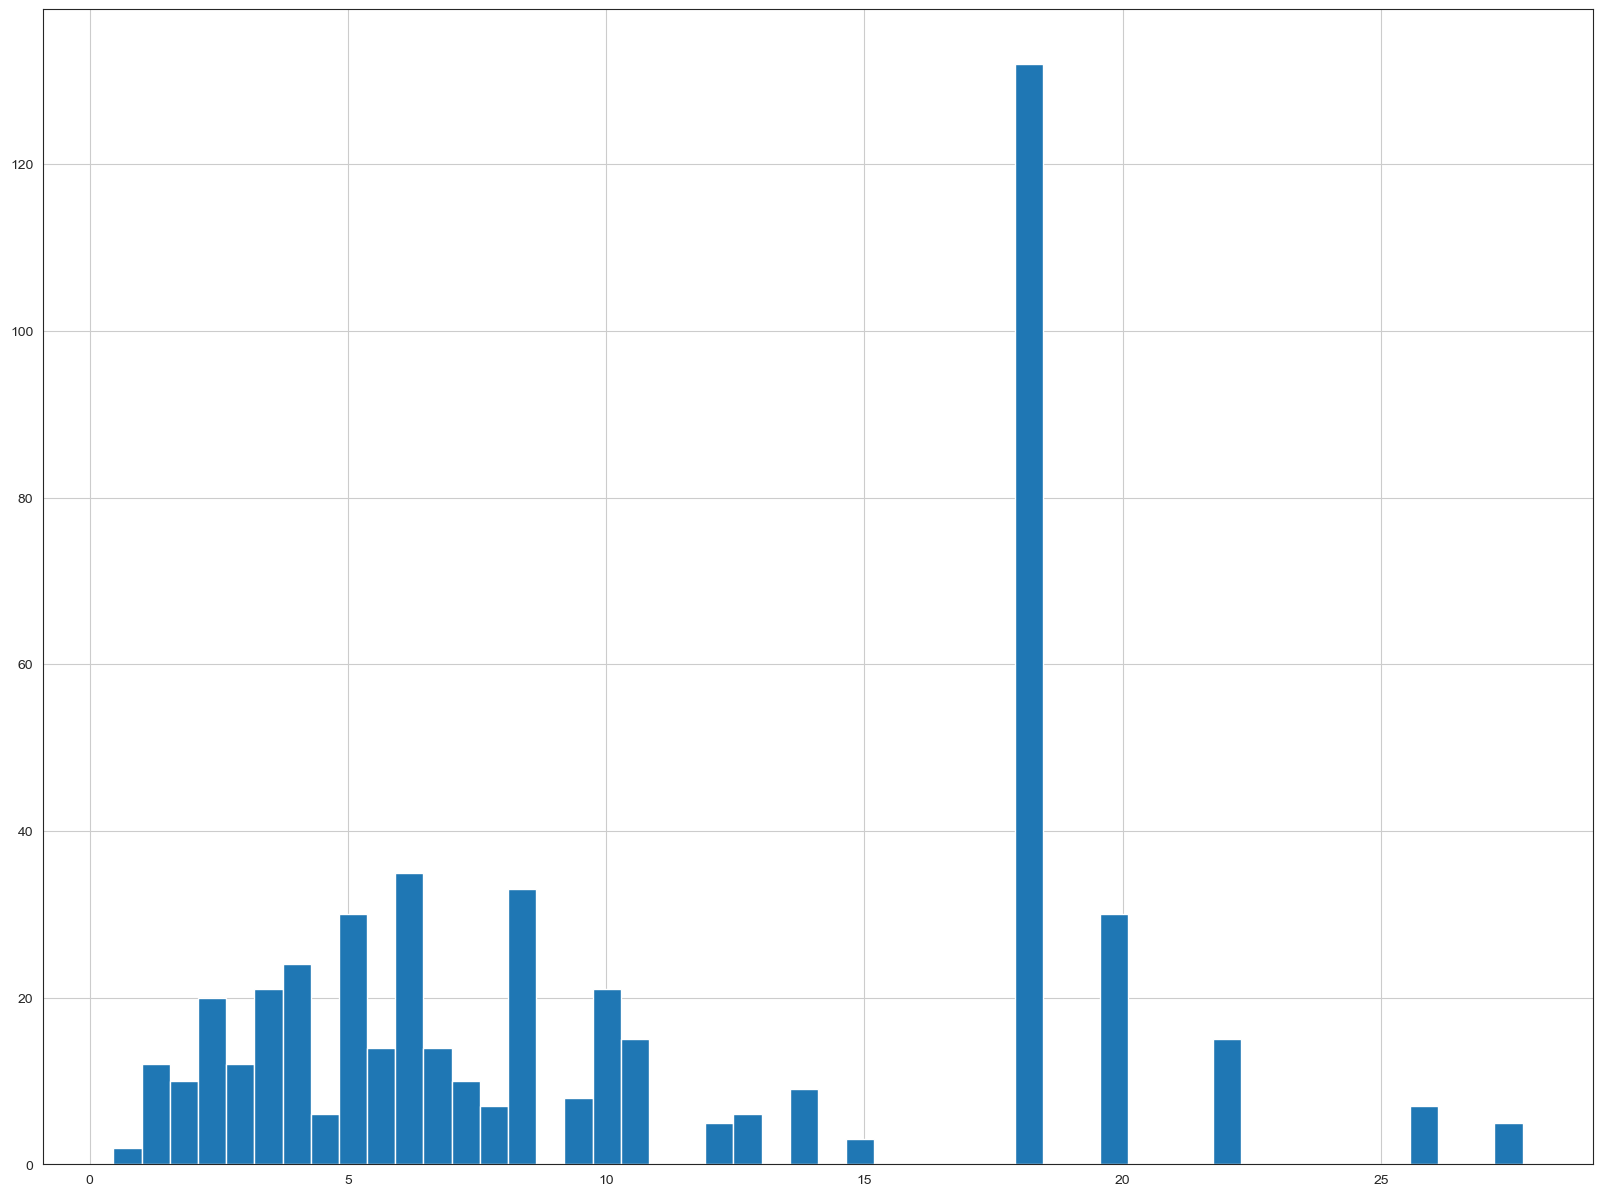

In [55]:
dataset['INDUS'].hist(bins=50, figsize=(20,15))
plt.show()

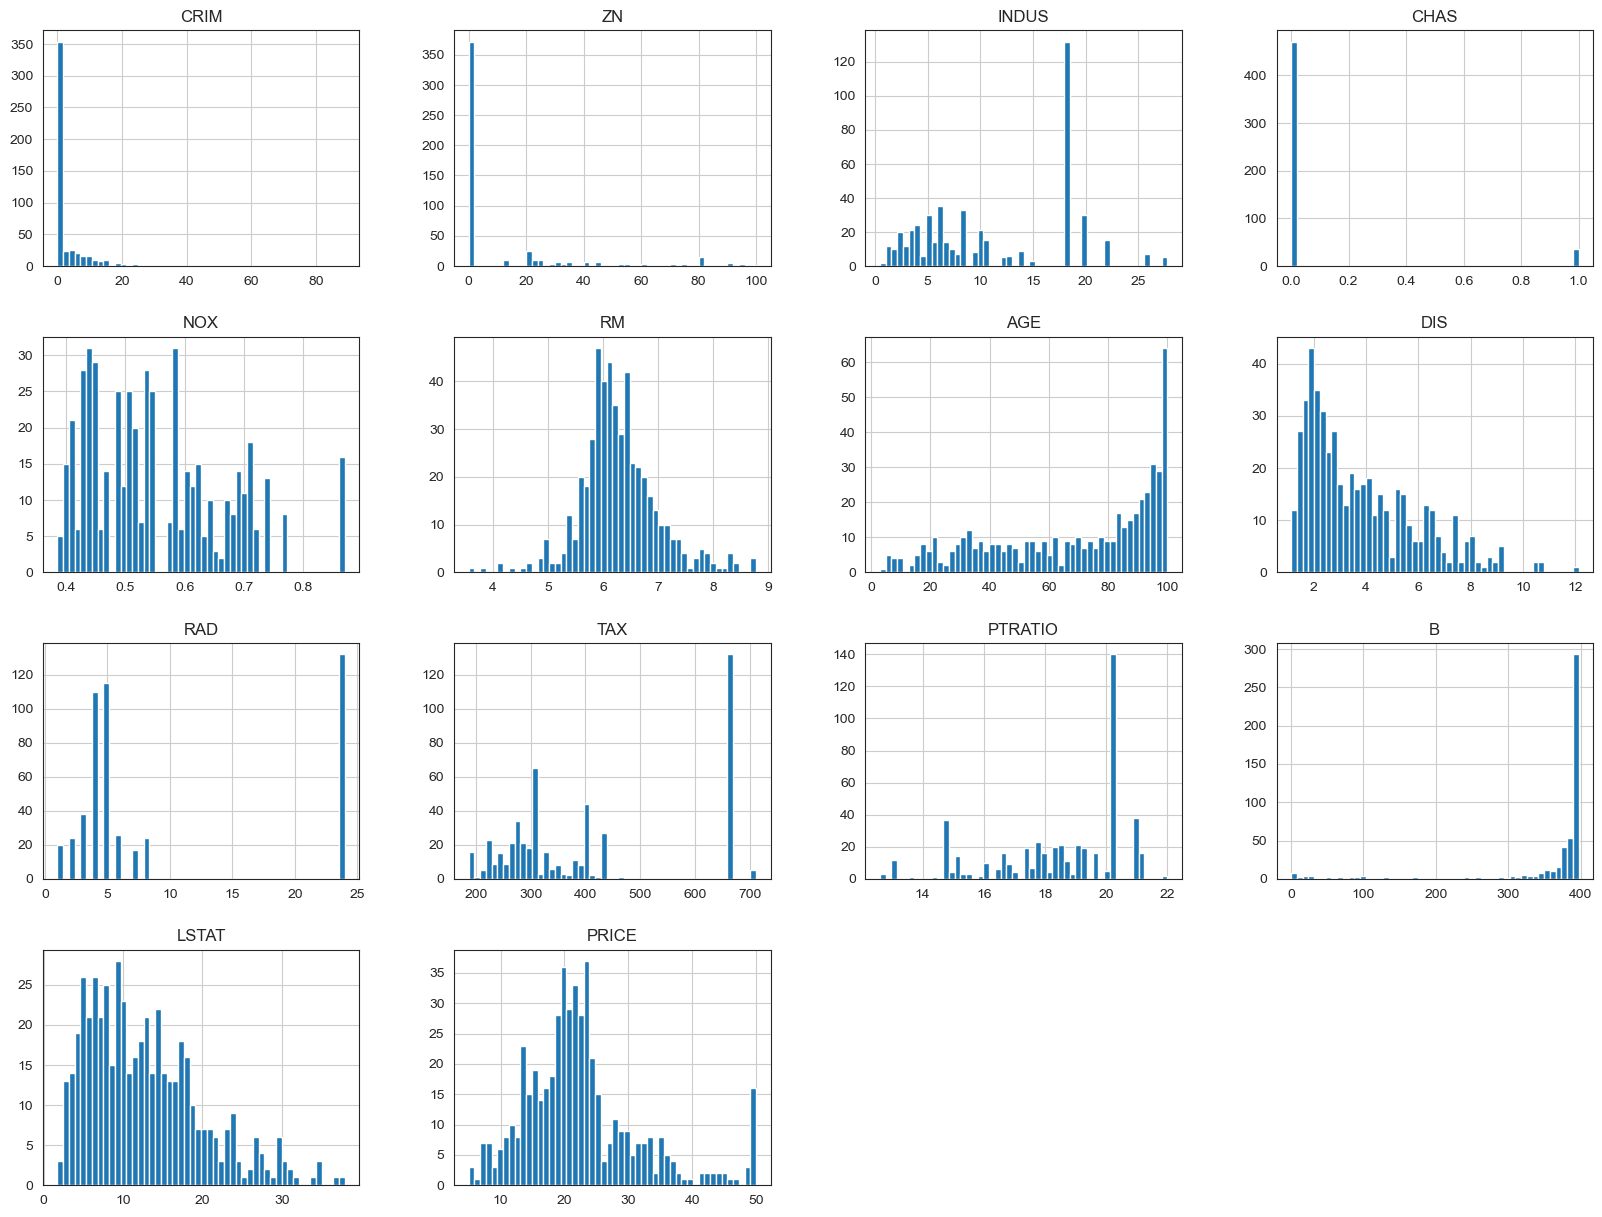

In [66]:
dataset.hist(bins=50, figsize=(20,15))
plt.show()

In [69]:
Correlation = dataset['RM'].corr(dataset['AGE'])

correlation

0.10562341249320993

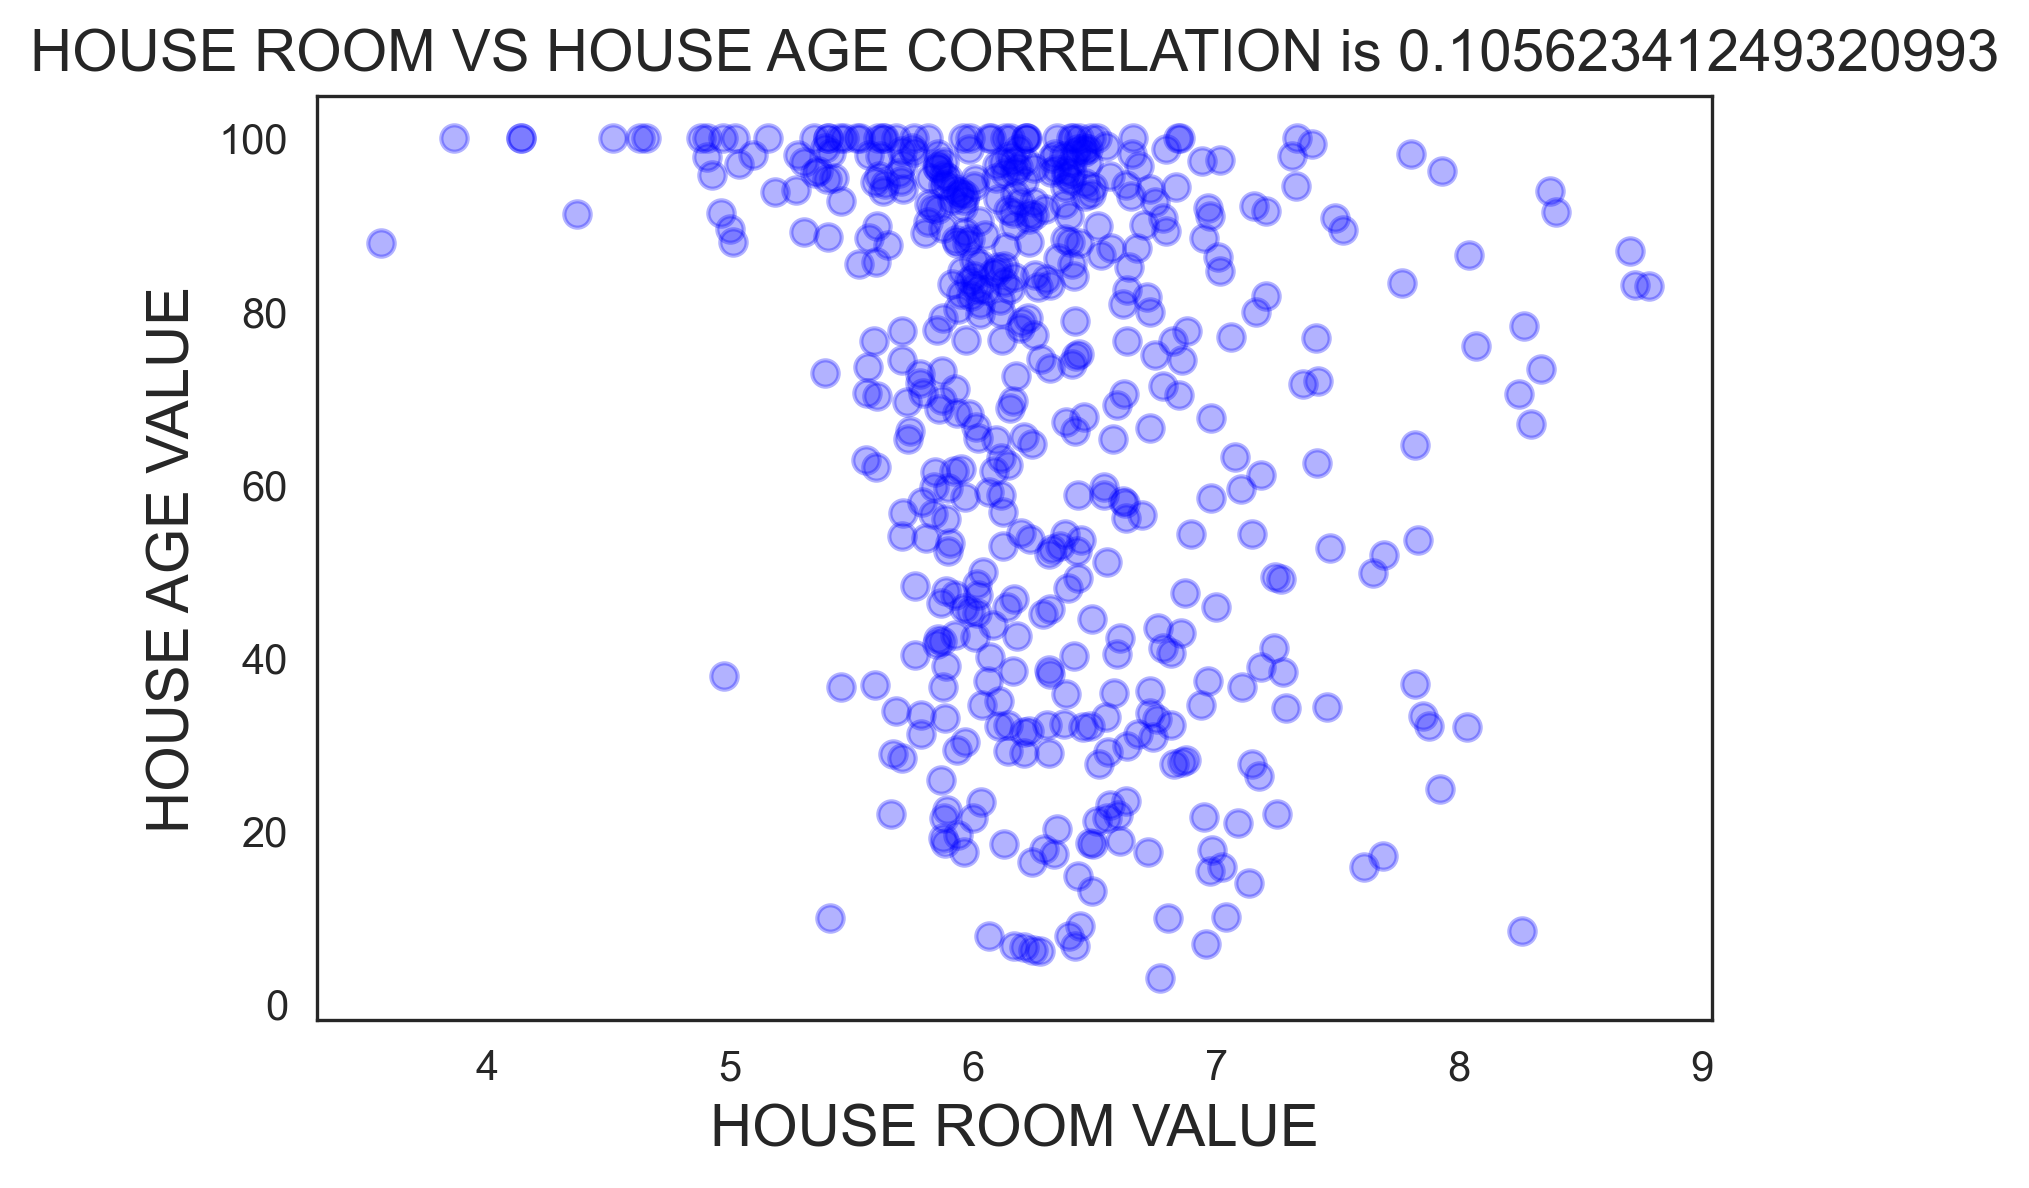

In [75]:
plt.figure(figsize=(6,4), dpi=300)
plt.scatter(x=dataset['RM'],y=dataset['AGE'], alpha=0.3, s=40,c="blue")
plt.title(f"HOUSE ROOM VS HOUSE AGE CORRELATION is {correlation}", fontsize=14)
plt.xlabel("HOUSE ROOM VALUE", fontsize=14)
plt.ylabel("HOUSE AGE VALUE", fontsize=14)
plt.show()

In [76]:
dataset.corr()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
PRICE   -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT     PRICE  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
PRICE    0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

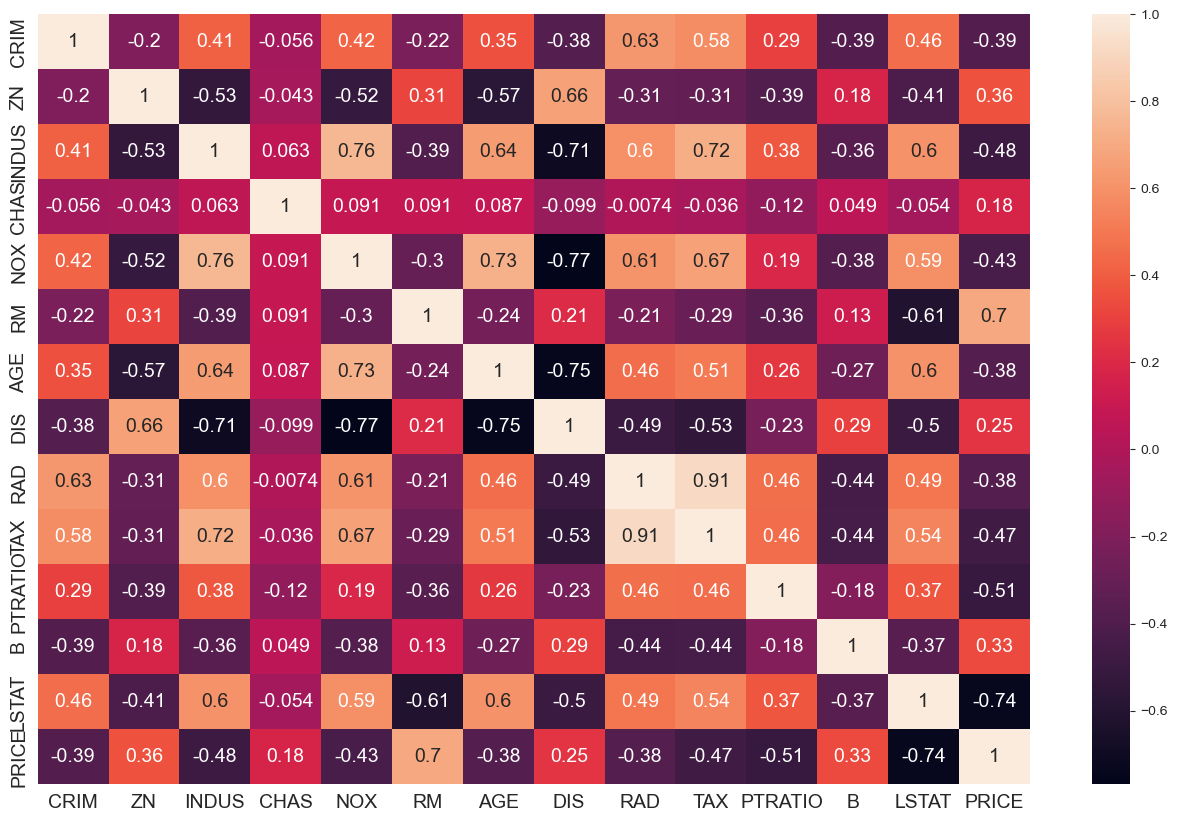

In [77]:
plt.figure(figsize=(16,10))
sns.heatmap(dataset.corr(),  annot=True, annot_kws={"size": 14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

CPU times: total: 0 ns
Wall time: 0 ns


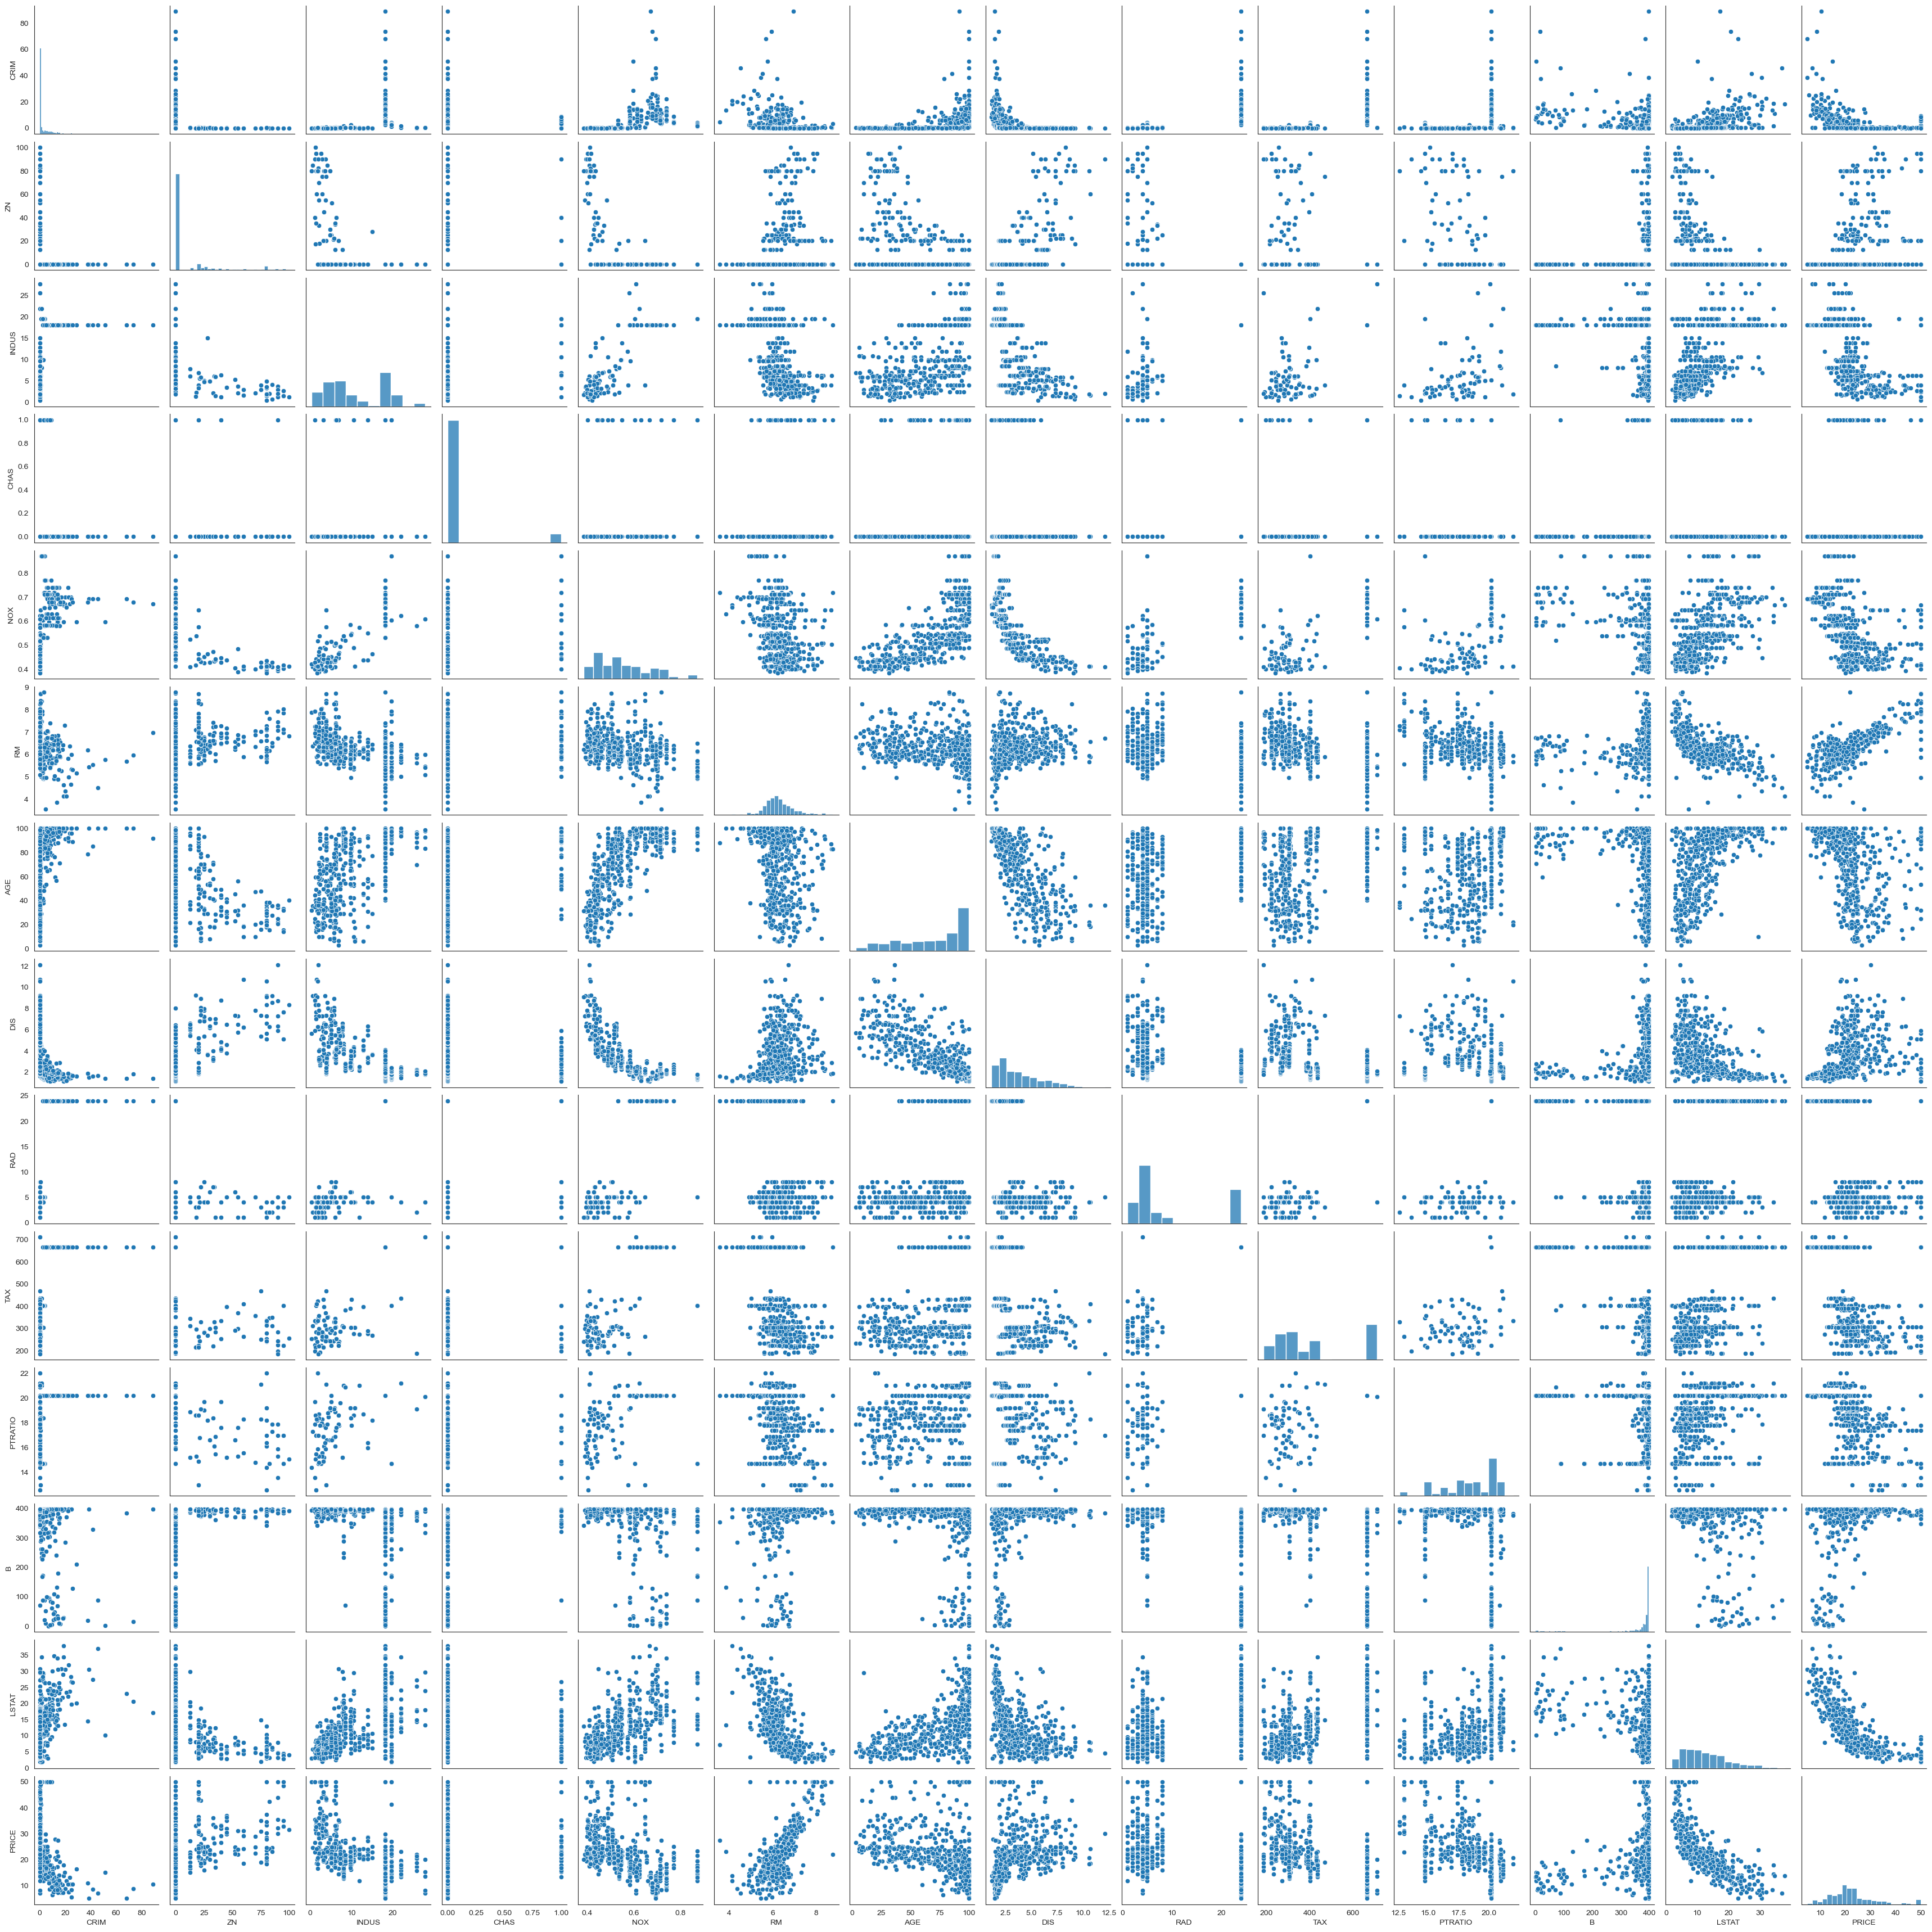

In [81]:
%time

sns.pairplot(dataset)
plt.show()